In [1]:
# assumes chatgpt model is already trained
# loads up DAG
# goal: test the accuracy of nanoGPT at predicting root
from pathlib import Path
import os 
HOME_DIR = os.path.expanduser("~")
BASE_DIR = Path(HOME_DIR) / "code/data_to_concept_unlearning/"

SECRETS = BASE_DIR / "notebooks" / "SECRETS" / "wandb.secret"
# open SECRETS
with open(SECRETS, "r") as f:
    API_key = f.read().strip()

    
import wandb

wandb.login(key=API_key)

from unlearning import synthetic_data
# Example Usage with the previously generated DAG:
from importlib import reload 
reload(synthetic_data)


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /n/home04/rrinberg/.netrc
wandb: Currently logged in as: royrinberg (harvardml) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


<module 'unlearning.synthetic_data' from '/n/home04/rrinberg/code/data_to_concept_unlearning/unlearning/synthetic_data.py'>

In [4]:
# load dag
L = 10
N = 80
C = 6
seed = 42

dag = synthetic_data.generate_dag(L, N, C, seed)

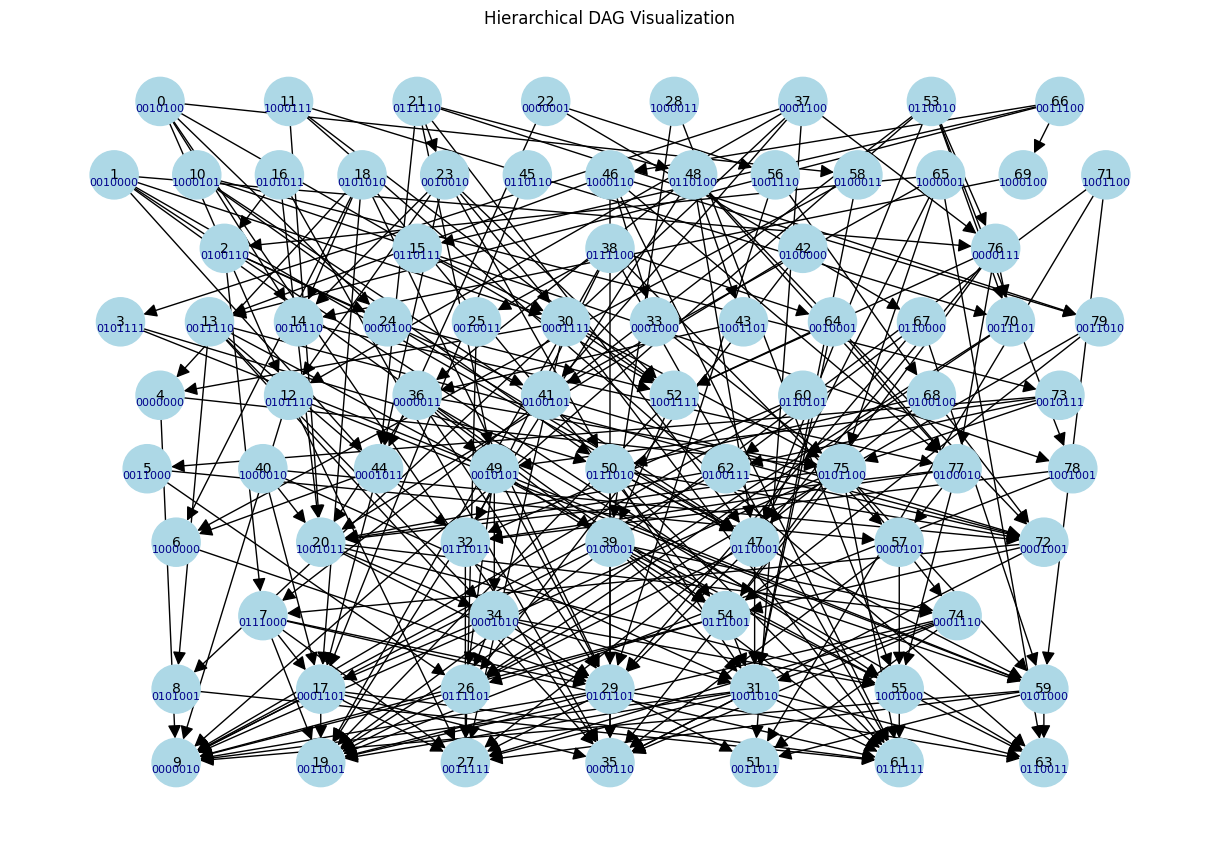

In [45]:
reload(synthetic_data)
synthetic_data.visualize_dag_layers(dag, highlight_nodes = [])



Overriding config with /n/home04/rrinberg/code/data_to_concept_unlearning/unlearning/nanoGPT/config/train_dag_gpt.py:
# train a miniature character-level shakespeare model
# good for debugging and playing on macbooks and such

out_dir = 'out-dag-gpt'
eval_interval = 250 # keep frequent because we'll overfit
eval_iters = 200
log_interval = 10 # don't print too too often

# we expect to overfit on this small dataset, so only save when val improves
always_save_checkpoint = False

wandb_log = True # override via command line if you like
wandb_project = 'data-to-concept'
wandb_run_name = 'dag-gpt'

#dataset = 'shakespeare_char'
gradient_accumulation_steps = 1
batch_size = 64
block_size = 256 # context of up to 256 previous characters

# baby GPT model :)
n_layer = 6
n_head = 6
n_embd = 384
dropout = 0.2

learning_rate = 1e-3 # with baby networks can afford to go a bit higher
max_iters = 5000
lr_decay_iters = 5000 # make equal to max_iters usually
min_lr = 1e-4 # learning_rate / 10 usually
b

In [9]:

import torch 
from unlearning.nanoGPT.model import GPTConfig, GPT


out_dir = 'out'
eval_interval = 2000
log_interval = 1
eval_iters = 200
eval_only = False # if True, script exits right after the first eval
always_save_checkpoint = True # if True, always save a checkpoint after each eval
init_from = 'scratch' # 'scratch' or 'resume' or 'gpt2*'
# wandb logging
wandb_log = False # disabled by default
wandb_project = 'owt'
wandb_run_name = 'gpt2' # 'run' + str(time.time())
# data
dataset = 'openwebtext'
gradient_accumulation_steps = 5 * 8 # used to simulate larger batch sizes
batch_size = 12 # if gradient_accumulation_steps > 1, this is the micro-batch size
block_size = 1024
# model
n_layer = 12
n_head = 12
n_embd = 768
dropout = 0.0 # for pretraining 0 is good, for finetuning try 0.1+
bias = False # do we use bias inside LayerNorm and Linear layers?
# adamw optimizer
learning_rate = 6e-4 # max learning rate
max_iters = 600000 # total number of training iterations
weight_decay = 1e-1
beta1 = 0.9
beta2 = 0.95
grad_clip = 1.0 # clip gradients at this value, or disable if == 0.0
# learning rate decay settings
decay_lr = True # whether to decay the learning rate
warmup_iters = 2000 # how many steps to warm up for
lr_decay_iters = 600000 # should be ~= max_iters per Chinchilla
min_lr = 6e-5 # minimum learning rate, should be ~= learning_rate/10 per Chinchilla
# DDP settings
backend = 'nccl' # 'nccl', 'gloo', etc.
# system
device = 'cuda' # examples: 'cpu', 'cuda', 'cuda:0', 'cuda:1' etc., or try 'mps' on macbooks
dtype = 'bfloat16' if torch.cuda.is_available() and torch.cuda.is_bf16_supported() else 'float16' # 'float32', 'bfloat16', or 'float16', the latter will auto implement a GradScaler

In [10]:
config_keys = [k for k,v in globals().items() if not k.startswith('_') and isinstance(v, (int, float, bool, str))]
config_file = "config/train_dag_gpt.py"
config_file = Path("/n/home04/rrinberg/code/data_to_concept_unlearning/unlearning/nanoGPT/config/train_dag_gpt.py")
print(f"Overriding config with {config_file}:")
with open(config_file) as f:
    print(f.read())
exec(open(config_file).read())

#exec(open('configurator.py').read()) # overrides from command line or config file

Overriding config with /n/home04/rrinberg/code/data_to_concept_unlearning/unlearning/nanoGPT/config/train_dag_gpt.py:
# train a miniature character-level shakespeare model
# good for debugging and playing on macbooks and such

out_dir = 'out-dag-gpt'
eval_interval = 250 # keep frequent because we'll overfit
eval_iters = 200
log_interval = 10 # don't print too too often

# we expect to overfit on this small dataset, so only save when val improves
always_save_checkpoint = False

wandb_log = True # override via command line if you like
wandb_project = 'data-to-concept'
wandb_run_name = 'dag-gpt'

#dataset = 'shakespeare_char'
gradient_accumulation_steps = 1
batch_size = 64
block_size = 256 # context of up to 256 previous characters

# baby GPT model :)
n_layer = 6
n_head = 6
n_embd = 384
dropout = 0.2

learning_rate = 1e-3 # with baby networks can afford to go a bit higher
max_iters = 5000
lr_decay_iters = 5000 # make equal to max_iters usually
min_lr = 1e-4 # learning_rate / 10 usually
b

In [12]:
BASE_DIR

PosixPath('/n/home04/rrinberg/code/data_to_concept_unlearning')

In [15]:
# load nanoGPT model
# model init
model_args = dict(n_layer=n_layer, n_head=n_head, n_embd=n_embd, block_size=block_size,
                  bias=bias, vocab_size=None, dropout=dropout) # start with model_args from command line

out_dir = BASE_DIR /"unlearning/nanoGPT/out-dag-gpt"
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# resume training from a checkpoint.
ckpt_path = os.path.join(out_dir, 'ckpt.pt')
checkpoint = torch.load(ckpt_path, map_location=device)
checkpoint_model_args = checkpoint['model_args']
# force these config attributes to be equal otherwise we can't even resume training
# the rest of the attributes (e.g. dropout) can stay as desired from command line
for k in ['n_layer', 'n_head', 'n_embd', 'block_size', 'bias', 'vocab_size']:
    model_args[k] = checkpoint_model_args[k]
# create the model
gptconf = GPTConfig(**model_args)
model = GPT(gptconf)
state_dict = checkpoint['model']

print(f"Loading model from checkpoint: {ckpt_path}")
# fix the keys of the state dictionary :(
# honestly no idea how checkpoints sometimes get this prefix, have to debug more
unwanted_prefix = '_orig_mod.'
for k,v in list(state_dict.items()):
    if k.startswith(unwanted_prefix):
        state_dict[k[len(unwanted_prefix):]] = state_dict.pop(k)
model.load_state_dict(state_dict)
iter_num = checkpoint['iter_num']
best_val_loss = checkpoint['best_val_loss']

/tmp/ipykernel_2063141/3793670876.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(ckpt_path, map_location=device)


number of parameters: 29.94M
Loading model from checkpoint: /n/home04/rrinberg/code/data_to_concept_unlearning/unlearning/nanoGPT/out-dag-gpt/ckpt.pt


In [42]:
# 
print(dag.nodes())
print(len(dag.nodes()))
node_ = 10

corrects = [None] * len(dag.nodes())

for node_i, node_ in enumerate(dag.nodes()):
    dag_subtree = synthetic_data.dfs_subtree_ordering(dag, node_)
    #input_ = torch.tensor([3,4,5])
    if len(dag_subtree) ==0:
        print(f"Node {node_} has no subtree, skipping...")
        continue
    input_ = torch.tensor(dag_subtree)  # convert to tensor
    input_ = input_.unsqueeze(0)  # make sure input is 1D tensor
    output = model(input_)

    predicted_token_ids = torch.argmax(output[0], dim=-1)
    predicted_token_ids

    if node_ == predicted_token_ids.item():
        corrects[node_i] = True
    else:
        corrects[node_i] = False
        print(f"Node {node_} predicted as {predicted_token_ids.item()} instead of {node_}")

# print the accuracy, ignore nones
corrects = [c for c in corrects if c is not None]  # filter out None values
accuracy = sum(corrects) / len(corrects) if corrects else 0.0
print(f"Total nodes evaluated: {len(corrects)}")


print(f"Accuracy of nanoGPT at predicting root nodes: {accuracy:.4f}")

[0, 11, 21, 22, 28, 37, 53, 66, 1, 10, 16, 18, 23, 45, 46, 48, 56, 58, 65, 69, 71, 2, 15, 38, 42, 76, 3, 13, 14, 24, 25, 30, 33, 43, 64, 67, 70, 79, 4, 12, 36, 41, 52, 60, 68, 73, 5, 40, 44, 49, 50, 62, 75, 77, 78, 6, 20, 32, 39, 47, 57, 72, 7, 34, 54, 74, 8, 17, 26, 29, 31, 55, 59, 9, 19, 27, 35, 51, 61, 63]
80
Node 14 predicted as 69 instead of 14
Node 25 predicted as 19 instead of 25
Node 30 predicted as 15 instead of 30
Node 79 predicted as 7 instead of 79
Node 52 predicted as 55 instead of 52
Node 40 predicted as 62 instead of 40
Node 77 predicted as 69 instead of 77
Node 6 predicted as 31 instead of 6
Node 20 predicted as 72 instead of 20
Node 32 predicted as 19 instead of 32
Node 72 predicted as 41 instead of 72
Node 7 predicted as 54 instead of 7
Node 34 predicted as 74 instead of 34
Node 54 predicted as 7 instead of 54
Node 8 predicted as 35 instead of 8
Node 17 predicted as 63 instead of 17
Node 26 predicted as 27 instead of 26
Node 29 predicted as 31 instead of 29
Node 31 pr

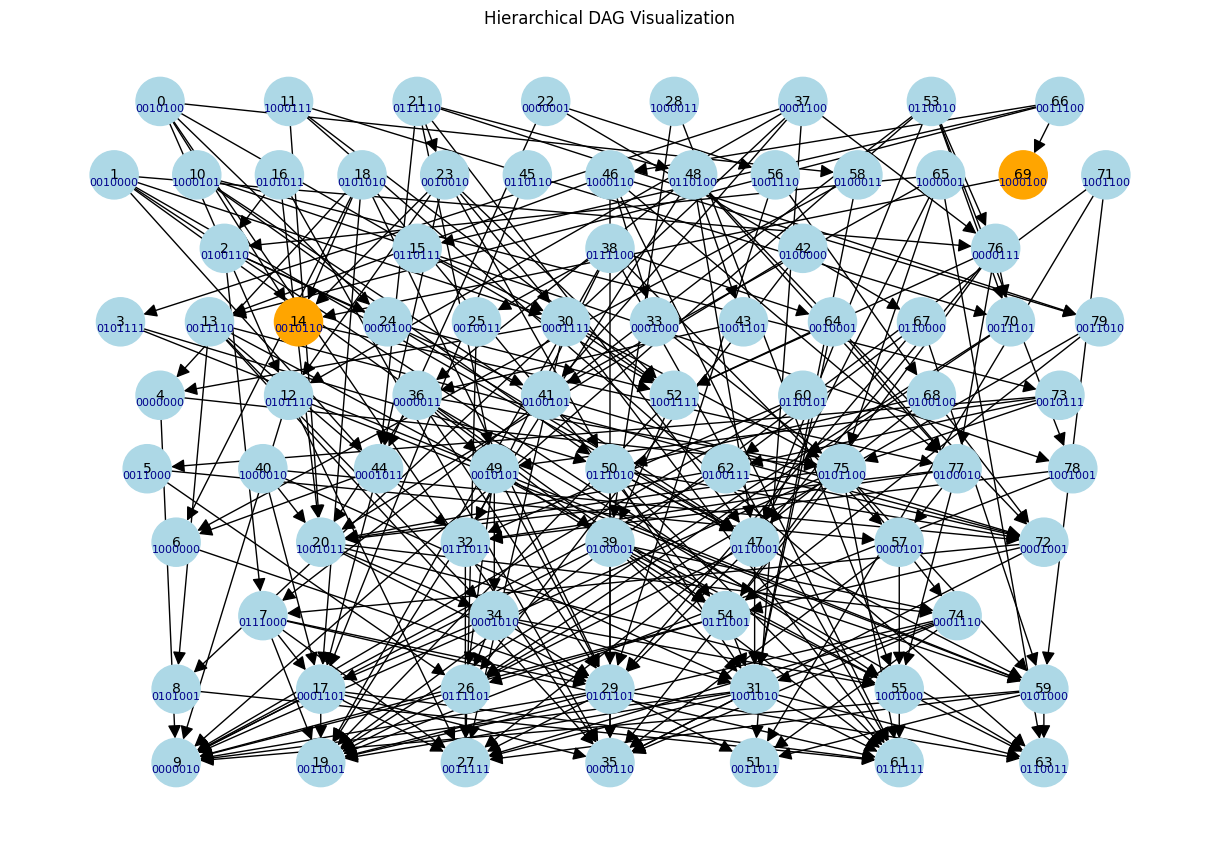

[14]
DFS subtree of node 69:
[14, 77, 32, 27, 20, 55, 61, 29, 63, 51, 9, 35, 19, 74, 31, 34, 26, 17, 57]


In [48]:
synthetic_data.visualize_dag_layers(dag, highlight_nodes = [14,69])
# list children of 69
children_of_69 = list(dag.successors(69))
print(children_of_69)
#print dfs
print( "DFS subtree of node 69:")
dag_subtree_69 = synthetic_data.dfs_subtree_ordering(dag, 69)
print( dag_subtree_69)

In [28]:
output[0].shape

torch.Size([1, 1, 50304])

tensor([[57]])